In [1]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt 
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

We just loaded our dataset

In [2]:
pd.set_option('display.max_colwidth', None)
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

We showed our dataset where we will work with the tweets and label

In [3]:
Data.head(20)
#len(Data)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


We just checked if there is any data which is unfilled or blank .we used .sum to get the total number of tweet which are blank

In [4]:
Data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
import re 
import string 

We declared tweet as our features with which we will process 

In [6]:
features=Data.iloc[:,2].values

features

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

Before work with data, We are deleting the unnecessary words,punctuations,white spaces and etc .Our aim is to clean the datas.


In [7]:
for i in range(len(features)):
  features[i]=features[i].replace("@user","")
  features[i]=features[i].translate(str.maketrans("","",string.punctuation))
  features[i]=''.join(i for i in features[i] if not i.isdigit())
  features[i]=re.sub(r'\s+',' ',features[i],flags=re.I)
  features[i]=re.sub(r'[!@#$%^&*()_+|\}{;:/><.}]','',features[i],flags=re.I)
  features[i]=re.sub(r'\s+[a-zA-Z]\s+', ' ',features[i])
  features=Data.iloc[:,2].values

After cleaning our datas,We showed them

In [8]:
Data.iloc[:,2].values

array([' when father is dysfunctional and is so selfish he drags his kids into his dysfunction run',
       ' thanks for lyft credit cant use cause they dont offer wheelchair vans in pdx disapointed getthanked',
       ' bihday your majesty', ...,
       'listening to sad songs on monday morning otw to work is sad ',
       ' sikh temple vandalised in in calgary wso condemns act ',
       'thank you for you follow '], dtype=object)

We used seed for the reproductability of our result

In [9]:
seed=42


We declared tweet as our features with which we will process 

In [10]:
features=Data.iloc[:,2].values

features

array([' when father is dysfunctional and is so selfish he drags his kids into his dysfunction run',
       ' thanks for lyft credit cant use cause they dont offer wheelchair vans in pdx disapointed getthanked',
       ' bihday your majesty', ...,
       'listening to sad songs on monday morning otw to work is sad ',
       ' sikh temple vandalised in in calgary wso condemns act ',
       'thank you for you follow '], dtype=object)

We declared label as our desired output 

In [11]:
labels=Data.iloc[:,1].values

labels

array([0, 0, 0, ..., 0, 1, 0])

Using NLTK, we tokenize the tweets into a list of words

In [12]:
import nltk
from nltk import word_tokenize

Data['tweet']=Data['tweet'].apply( lambda x : word_tokenize(x) )


In [13]:
Data

,id,label,tweet
0,1,0,"[when, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]"
1,2,0,"[thanks, for, lyft, credit, cant, use, cause, they, dont, offer, wheelchair, vans, in, pdx, disapointed, getthanked]"
2,3,0,"[bihday, your, majesty]"
3,4,0,"[model, love, take, with, all, the, time, in, urð±, ðððð, ð¦ð¦ð¦]"
4,5,0,"[factsguide, society, now, motivation]"
...,...,...,...
31957,31958,0,"[ate, isz, that, youuuðððððððððâ¤ï¸]"
31958,31959,0,"[to, see, nina, turner, on, the, airwaves, trying, to, wrap, herself, in, the, mantle, of, genuine, hero, like, shirley, chisolm, shame, imwithher]"
31959,31960,0,"[listening, to, sad, songs, on, monday, morning, otw, to, work, is, sad]"
31960,31961,1,"[sikh, temple, vandalised, in, in, calgary, wso, condemns, act]"


We removed the stop words and non alpha words

In [14]:
from nltk.corpus import stopwords
stopwords=stopwords.words("english")
Data['tweet']=Data['tweet'].apply( lambda x : [word for word in x if word not in stopwords and word.isalpha() ])

Data

,id,label,tweet
0,1,0,"[father, dysfunctional, selfish, drags, kids, dysfunction, run]"
1,2,0,"[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, vans, pdx, disapointed, getthanked]"
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, take, time]"
4,5,0,"[factsguide, society, motivation]"
...,...,...,...
31957,31958,0,"[ate, isz]"
31958,31959,0,"[see, nina, turner, airwaves, trying, wrap, mantle, genuine, hero, like, shirley, chisolm, shame, imwithher]"
31959,31960,0,"[listening, sad, songs, monday, morning, otw, work, sad]"
31960,31961,1,"[sikh, temple, vandalised, calgary, wso, condemns, act]"


We stemmed the words to bring them in the basic form 

In [15]:
from nltk import WordNetLemmatizer  
lemma = WordNetLemmatizer() 
Data['tweet']=Data['tweet'].apply(lambda x : [lemma.lemmatize(word) for word in x])
Data

,id,label,tweet
0,1,0,"[father, dysfunctional, selfish, drag, kid, dysfunction, run]"
1,2,0,"[thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]"
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, take, time]"
4,5,0,"[factsguide, society, motivation]"
...,...,...,...
31957,31958,0,"[ate, isz]"
31958,31959,0,"[see, nina, turner, airwave, trying, wrap, mantle, genuine, hero, like, shirley, chisolm, shame, imwithher]"
31959,31960,0,"[listening, sad, song, monday, morning, otw, work, sad]"
31960,31961,1,"[sikh, temple, vandalised, calgary, wso, condemns, act]"


Add POS tags to each word

In [16]:
Data['tweet']=Data['tweet'].apply(lambda x : [nltk.pos_tag(x)])
Data['tweet']=Data['tweet'].apply(lambda x : [str(word_pair[0])+'_'+str(word_pair[1]) for word_pair in x[0]])

Modify dataframe structure to prepare data for DL

In [17]:
Data['tweet']=Data['tweet'].apply(lambda x : [' '.join(x)])
Data['tweet']=Data['tweet'].str[0]
Data

,id,label,tweet
0,1,0,father_RBR dysfunctional_JJ selfish_JJ drag_NN kid_NN dysfunction_NN run_VB
1,2,0,thanks_NNS lyft_VBP credit_NN cant_NN use_NN cause_NN dont_NN offer_VBP wheelchair_NN van_NN pdx_NN disapointed_VBD getthanked_VBD
2,3,0,bihday_NN majesty_NN
3,4,0,model_NN love_VB take_NN time_NN
4,5,0,factsguide_RB society_NN motivation_NN
...,...,...,...
31957,31958,0,ate_NN isz_NN
31958,31959,0,see_VB nina_JJ turner_NNS airwave_VBP trying_VBG wrap_NN mantle_FW genuine_JJ hero_NN like_IN shirley_NN chisolm_NN shame_NN imwithher_NN
31959,31960,0,listening_VBG sad_NN song_NN monday_JJ morning_NN otw_NN work_NN sad_NN
31960,31961,1,sikh_JJ temple_NNS vandalised_VBD calgary_JJ wso_NN condemns_NN act_NN


We split the dataset.
We use 70% of data for training and 30% for testing 

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

features=Data.iloc[:,2].values
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=42)

In [19]:
X_train

array(['summer_NN summeriscoming_VBG swimming_VBG picoftheday_JJ tattoo_NN issho_JJ pulsera_NN fluyendo_NN',
       'dese_JJ nigga_MD show_VB dese_JJ otha_NNS bitch_VBP fb_NN snap_NN nd_VBP twitter_NN attention_NN dey_VBZ girl_JJ true_JJ',
       'boost_NN immune_NN system_NN allow_IN body_NN use_NN energy_NN',
       ...,
       'black_JJ professor_NN make_VBP assumption_NN entire_JJ race_NN whilst_NN speaking_VBG entire_JJ race_NN next_IN week_NN',
       'lgbtqhatetrumppay_NN total_JJ liberal_JJ trash_NN amp_NN pathetic_JJ neverhillary_JJ noobamardterm_JJ indiestrump_NN usa_NN',
       'make_NN people_NNS relative_JJ way_NN africa_NN'], dtype=object)

In [20]:
from keras.preprocessing.text import Tokenizer
token=Tokenizer(num_words=10000)
token.fit_on_texts(X_train)   #was fit_on_sequences but was returning empty lists when calling texts_to_sequences

In [21]:
X_train

array(['summer_NN summeriscoming_VBG swimming_VBG picoftheday_JJ tattoo_NN issho_JJ pulsera_NN fluyendo_NN',
       'dese_JJ nigga_MD show_VB dese_JJ otha_NNS bitch_VBP fb_NN snap_NN nd_VBP twitter_NN attention_NN dey_VBZ girl_JJ true_JJ',
       'boost_NN immune_NN system_NN allow_IN body_NN use_NN energy_NN',
       ...,
       'black_JJ professor_NN make_VBP assumption_NN entire_JJ race_NN whilst_NN speaking_VBG entire_JJ race_NN next_IN week_NN',
       'lgbtqhatetrumppay_NN total_JJ liberal_JJ trash_NN amp_NN pathetic_JJ neverhillary_JJ noobamardterm_JJ indiestrump_NN usa_NN',
       'make_NN people_NNS relative_JJ way_NN africa_NN'], dtype=object)

Embed the words

In [22]:
X_train=token.texts_to_sequences(X_train)
X_test=token.texts_to_sequences(X_test)
maxlen=200

In [23]:
X_train

[[51, 1, 6793, 4, 1100, 4, 596, 2, 1373, 1, 2, 1, 6794, 1],
 [2624,
  2,
  705,
  21,
  102,
  7,
  2624,
  2,
  6,
  531,
  5,
  1603,
  1,
  1929,
  1,
  521,
  5,
  275,
  1,
  1374,
  1,
  3711,
  15,
  46,
  2,
  198,
  2],
 [4379, 1, 6795, 1, 1026, 1, 1276, 9, 336, 1, 379, 1, 779, 1],
 [444, 4, 1, 3712, 4, 145, 7, 30, 2, 431, 1, 30, 2, 86, 1],
 [133, 6, 97, 5, 144, 1, 20, 1],
 [19, 1, 686, 1, 195, 1, 6, 780, 5, 12, 7, 1],
 [971, 1, 1316, 5, 971, 1, 2892, 1, 940, 9, 373, 6, 1809, 1],
 [543, 3, 145, 7, 188, 2, 492, 1, 1277, 2, 543, 1, 39, 1, 1213, 1, 12, 7],
 [58, 23, 176, 2, 1123, 9, 432, 1, 352, 1, 15, 433, 2, 158, 2, 2893, 1],
 [1278, 1, 330, 3, 6796, 2, 501, 1, 1101, 1, 6797, 1],
 [1060, 2, 1214, 8, 2, 44, 1],
 [27, 2, 414, 1, 27, 2, 26, 2],
 [2060, 2, 5297, 1, 1604, 1, 78, 1, 2060, 1],
 [29, 5, 2],
 [1, 6798, 2, 176, 2, 5298, 23, 28, 1, 11, 1],
 [412, 1, 22, 9, 1215, 1, 862, 1, 259, 2, 5299, 2, 1605, 1, 2234, 6, 3713, 5],
 [44, 1, 1102, 9, 44, 1, 6, 37, 5, 348, 6, 187, 4],
 [2

In [24]:
from keras.preprocessing.sequence import pad_sequences

X_train=pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test=pad_sequences(X_test,padding='post',maxlen=maxlen)

In [25]:
X_test.shape

(9589, 200)

In [26]:
X_train.shape

(22373, 200)

In [27]:
features.shape

(31962,)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, GlobalMaxPool1D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.layers.pooling import GlobalMaxPool1D
from keras.layers.embeddings import Embedding

In [29]:
model=Sequential()

Here We used embedding layer at first 
Then we used flattening t
Then we used two dense layer with 12 and 7 unit respectively 
We used 

In [30]:
vocab_size=len(token.word_index)+1
model.add(Embedding(input_dim=vocab_size,output_dim=50,input_length=maxlen, trainable=True))
model.add(GlobalMaxPool1D())
#model.add(Flatten())


model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           1438250   
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 12)                612       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 91        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                        

We now need to fit the model 

In [31]:
history = model.fit(X_train,y_train,batch_size=40,epochs=6,verbose=True,validation_data=(X_test,y_test))

Epoch 1/6
560/560 [==============================] - 14s 23ms/step - loss: 0.3510 - accuracy: 0.9277 - val_loss: 0.2291 - val_accuracy: 0.9287
Epoch 2/6
560/560 [==============================] - 13s 23ms/step - loss: 0.1742 - accuracy: 0.9397 - val_loss: 0.1457 - val_accuracy: 0.9524
Epoch 3/6
560/560 [==============================] - 13s 23ms/step - loss: 0.0983 - accuracy: 0.9602 - val_loss: 0.1411 - val_accuracy: 0.9578
Epoch 4/6
560/560 [==============================] - 15s 26ms/step - loss: 0.0703 - accuracy: 0.9695 - val_loss: 0.1435 - val_accuracy: 0.9579
Epoch 5/6
560/560 [==============================] - 13s 23ms/step - loss: 0.0507 - accuracy: 0.9762 - val_loss: 0.1510 - val_accuracy: 0.9570
Epoch 6/6
560/560 [==============================] - 13s 23ms/step - loss: 0.0379 - accuracy: 0.9805 - val_loss: 0.1832 - val_accuracy: 0.9589


In [32]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9954
Testing Accuracy:  0.9589


In [33]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

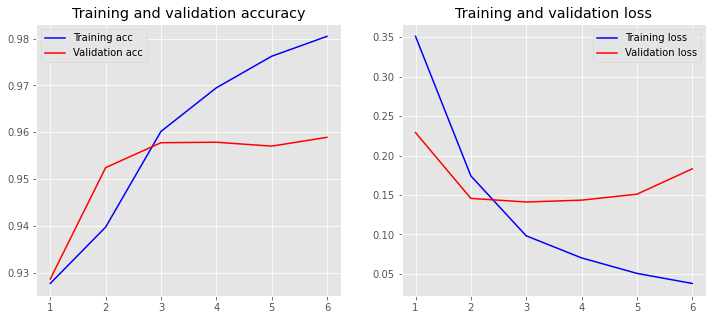

In [34]:
plot_history(history)

In [35]:
from keras.backend import clear_session
clear_session()